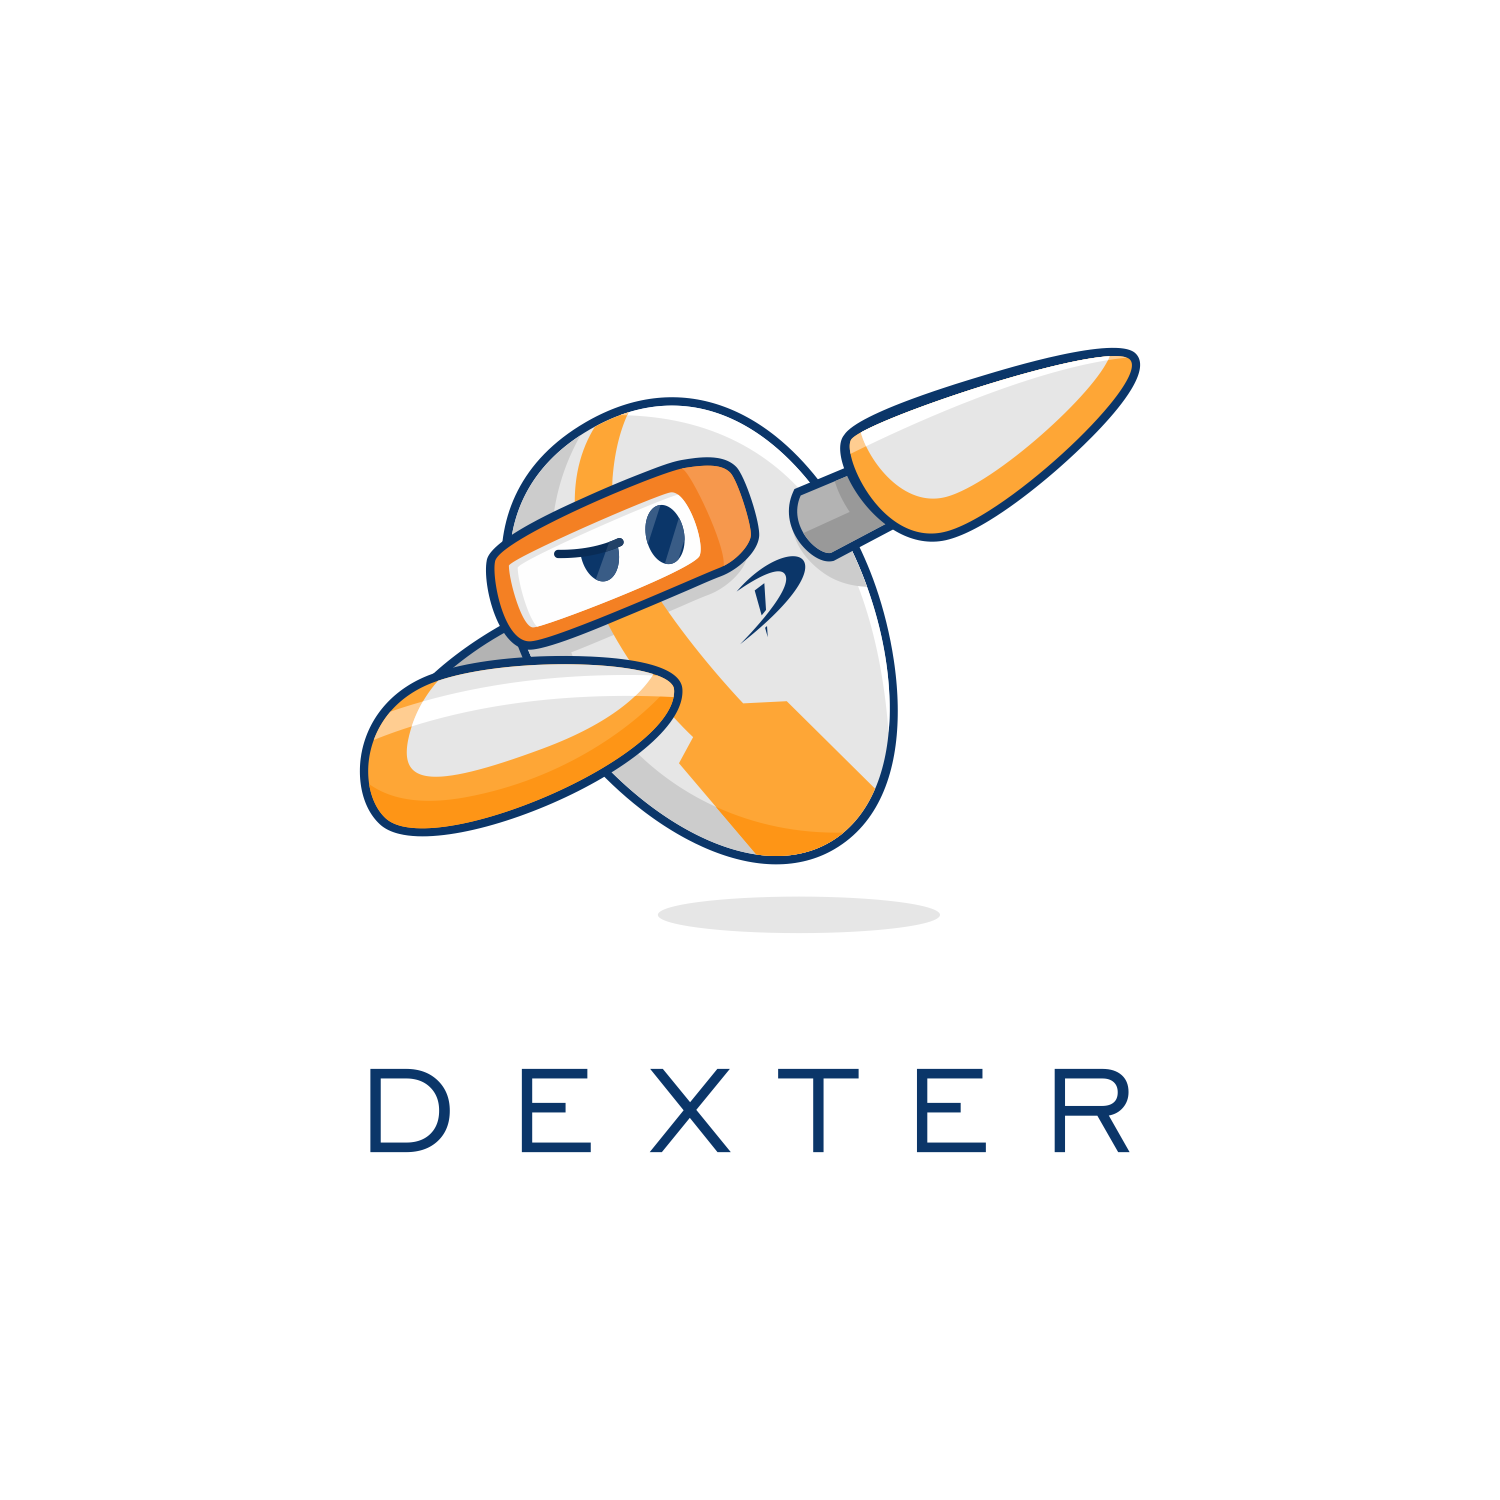
# KNeighbors Project

In statistics

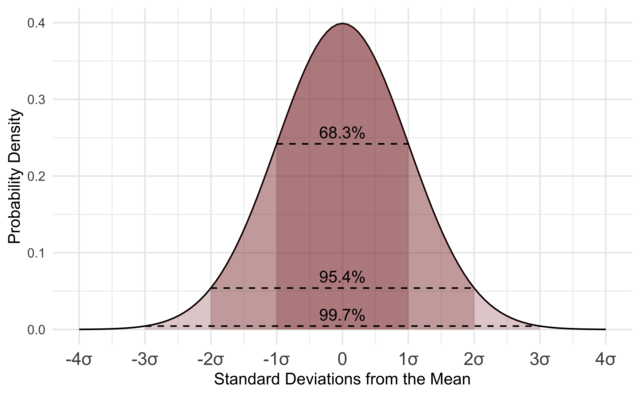

The k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, normalizing the training data can improve its accuracy dramatically.

Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.

The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.

#### Importing all important libraries

In [1]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
knn_pro = pd.read_csv('KNN_Project_Data',index_col=0)

In [57]:
knn_pro.head(7)

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0


In [5]:
knn_pro.describe()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [6]:
knn_pro.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000 entries, 1636.6706142430207 to 1287.1500253834342
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GWYH          1000 non-null   float64
 1   TRAT          1000 non-null   float64
 2   TLLZ          1000 non-null   float64
 3   IGGA          1000 non-null   float64
 4   HYKR          1000 non-null   float64
 5   EDFS          1000 non-null   float64
 6   GUUB          1000 non-null   float64
 7   MGJM          1000 non-null   float64
 8   JHZC          1000 non-null   float64
 9   TARGET CLASS  1000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.9 KB


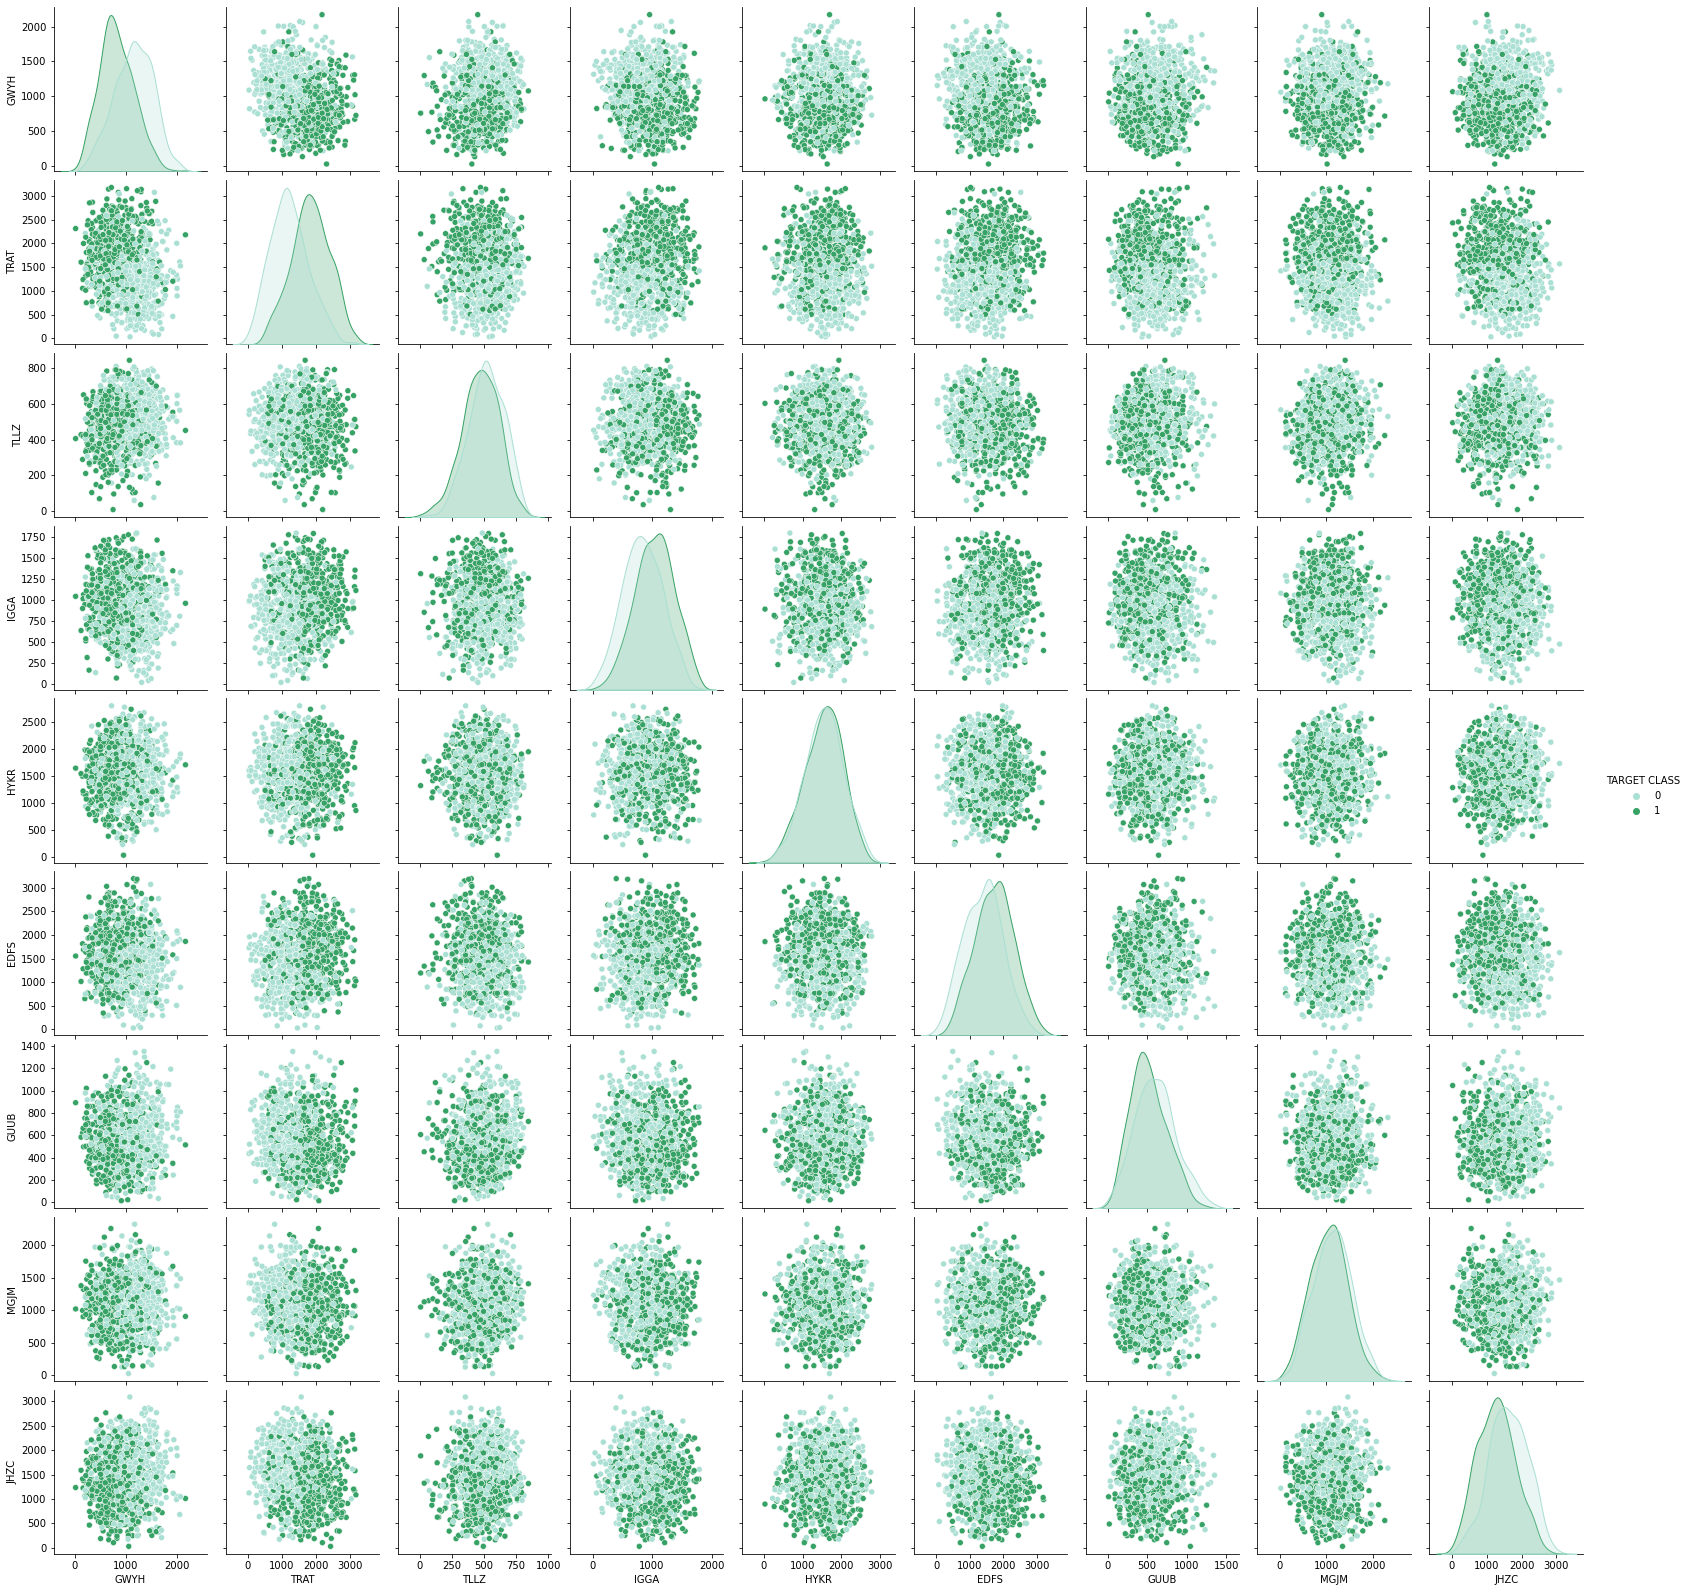

In [7]:
sns.pairplot(knn_pro,hue='TARGET CLASS',palette='BuGn')

# Standardize the variable


Standardization is the process of putting different variables on the same scale. In regression analysis, there are some scenarios where it is crucial to standardize your independent variables or risk obtaining misleading results.

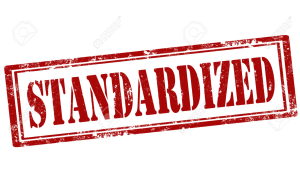


#### Why we Standardize the variable?
In regression analysis, we need to standardize the independent variables when your model contains polynomial terms to model curvature or interaction terms. These terms provide crucial information about the relationships between the independent variables and the dependent variable, but they also generate high amounts of multicollinearity.

Multicollinearity refers to independent variables that are correlated. This problem can obscure the statistical significance of model terms, produce imprecise coefficients, and make it more difficult to choose the correct model.

*When you include polynomial and interaction terms, your model almost certainly has excessive amounts of multicollinearity. These higher-order terms multiply independent variables that are in the model. Consequently, it’s easy to see how these terms are correlated with other independent variables in the model.*

*When your model includes these types of terms, you are at risk of producing misleading results and missing statistically significant terms.*

**Fortunately, we’re in luck because standardizing the independent variables is a simple method to reduce multicollinearity that is produced by higher-order terms. Although, it’s important to note that it won’t work for other causes of multicollinearity.**

Standardizing your independent variables can also help you determine which variable is the most important.

#### How to Standardize the Variables?
***Standardizing variables is a simple process. Most statistical software can do this for you automatically. Usually, standardization refers to the process of subtracting the mean and dividing by the standard deviation. However, to remove multicollinearity caused by higher-order terms, I recommend only subtracting the mean and not dividing by the standard deviation. Subtracting the means is also known as centering the variables.***

Centering the variables and standardizing them will both reduce the multicollinearity. However, standardizing changes the interpretation of the coefficients.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(knn_pro.drop('TARGET CLASS',axis=1))

StandardScaler()

#### .transform() method to transform the features to a scaled version

In [11]:
scaled_features = scaler.transform(knn_pro.drop('TARGET CLASS',axis=1))

#### Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [12]:
knn_pro_feat = pd.DataFrame(scaled_features,columns=knn_pro.columns[:-1])

In [13]:
knn_pro_feat.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


#  Train Test Split

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,knn_pro['TARGET CLASS'],test_size=0.30)

# Using KNN
#### Import KNeighborsClassifier from scikit learn

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#creating a KNN model instance with the n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
#fit the model into the training model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations


* Classification Accuracy
* Logarithmic Loss
* Confusion Matrix
* Area under Curve
* F1 Score
* Mean Absolute Error
* Mean Squared Error

In [19]:
#use the predict method to predict values using KNN_model and X_model
predict = knn.predict(X_test
                     )

In [20]:
#create confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix


In [21]:
print(confusion_matrix(y_test,predict))

[[110  45]
 [ 35 110]]


In [22]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       155
           1       0.71      0.76      0.73       145

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



# Choosing a K value

#### Error rates

There are many results on the error rate of the k nearest neighbour classifiers.The k-nearest neighbour classifier is strongly (that is for any joint distribution on {\displaystyle (X,Y)}(X,Y)) consistent provided {\displaystyle k:=k_{n}}k:=k_{n} diverges and {\displaystyle k_{n}/n}k_{n}/n converges to zero as {\displaystyle n\to \infty }n\to \infty .

Let {\displaystyle C_{n}^{knn}}C_{n}^{{knn}} denote the k nearest neighbour classifier based on a training set of size n. Under certain regularity conditions, the excess risk yields the following asymptotic expansion.
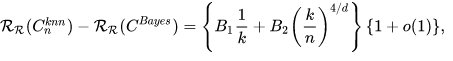

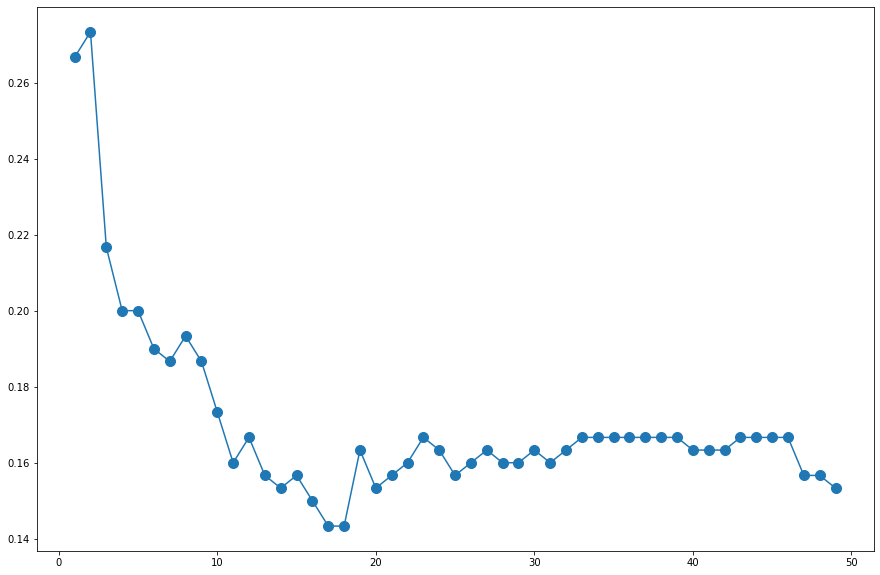

In [28]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=10)

Text(0, 0.5, 'Error Rate')

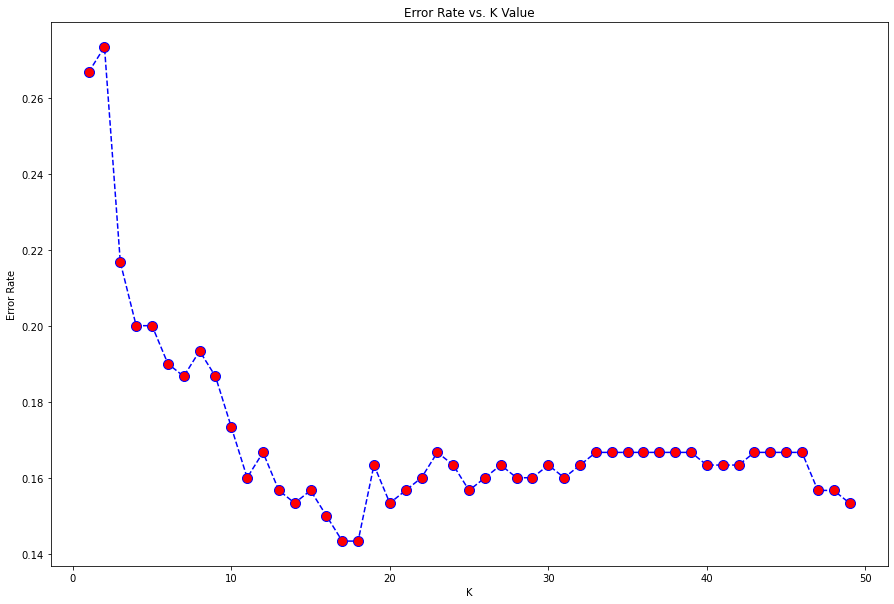

In [30]:
plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Retraining a new K value

#### Retraining Models on New Data

For a model to predict accurately, the data that it is making predictions on must have a similar distribution as the data on which the model was trained. Because data distributions can be expected to drift over time, deploying a model is not a one-time exercise but rather a continuous process. It is a good practice to continuously monitor the incoming data and retrain your model on newer data if you find that the data distribution has deviated significantly from the original training data distribution. If monitoring data to detect a change in the data distribution has a high overhead, then a simpler strategy is to train the model periodically, for example, daily, weekly, or monthly. In order to retrain models in we would need to create a new model based on your new training data.

In [44]:
#choosing different values 
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('With K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With K=30


[[128  27]
 [ 22 123]]


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       155
           1       0.82      0.85      0.83       145

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



# Seems the K prediction value get still after 30 soo the perfect value is around 84